<a href="https://colab.research.google.com/github/PrithviChandra/VIP-AINE/blob/main/Project_7_Statistical_Analysis_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 7: Statistical Analysis and Hypothesis Testing

## Packages and setup

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cookie_cats.csv to cookie_cats (1).csv


### Reading data and initial processing

In [ ]:
#Read data using pandas
import io
user_df=pd.read_csv(io.BytesIO(uploaded['cookie_cats.csv']))



In [ ]:
#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [ ]:
#Check for any missing values in the data using isnull() function
user_df.isnull()


,userid,version,sum_gamerounds,retention_1,retention_7
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
90184,False,False,False,False,False
90185,False,False,False,False,False
90186,False,False,False,False,False
90187,False,False,False,False,False


### Q1.2 Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

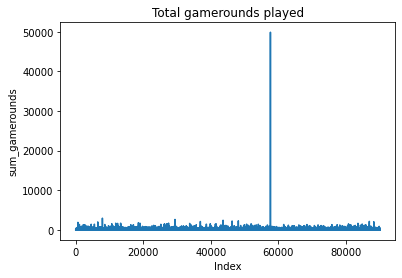

In [ ]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

In [ ]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier
r1=user_df['sum_gamerounds'].max()
r1
r2=user_df.index[user_df['sum_gamerounds'] == r1]
r2
#Filtering the outlier
user_df=user_df.drop([user_df.index[57702]])
user_df

49854

Int64Index([57702], dtype='int64')

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


Text(0.5, 1.0, 'Total gamerounds played [Outlier removed]')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

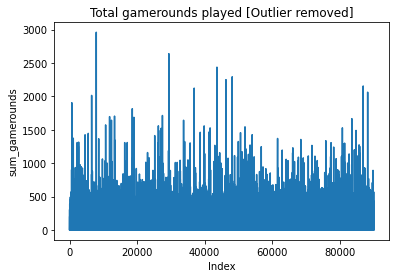

In [ ]:
#Plot the graph for sum_gamerounds player after removing the outlier
plt.title("Total gamerounds played [Outlier removed]")
plt.xlabel('Index')
plt.ylabel('sum_gamerounds')
plt.plot(df.sum_gamerounds)


## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [ ]:
#Insert calculation for 7-day retention rate

retention_rate_7= user_df['retention_7'].mean()
print("Overal 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")


Overal 7 days retention rate of the game for both versions is:  0.1860557945624695 %


### Q2.2 How many players never played the game after installing? 

In [ ]:
# Find number of customers with sum_gamerounds is equal to zero

count= user_df['sum_gamerounds'][user_df.sum_gamerounds==0].count()
count


3994

### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

In [ ]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
df_new = user_df.groupby('sum_gamerounds').count().iloc[0:200, 3: ]
display(df_new)


,retention_7
sum_gamerounds,
0,3994
1,5538
2,4606
3,3958
4,3629
...,...
195,43
196,46
197,39


Text(0.5, 1.0, 'First 200 gamerounds stats')

Text(0.5, 0, 'Gameround')

Text(0, 0.5, 'No.of users')

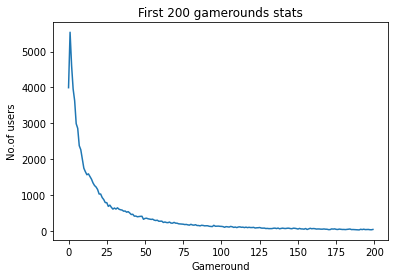

In [ ]:
#Use plot() function on the summarized stats to visualize the chart
plt.title("First 200 gamerounds stats")
plt.xlabel("Gameround")
plt.ylabel("No.of users")
plt.plot(df_new.index,df_new.retention_7)


## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [ ]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<mark>__Analsysis Results:__
    
Type your interpretation here from the crosstab generated above   
For gate_40 7 day retention rate is lower compared to gate_30.

### Q3.2 Gamerounds summary for different game versions

In [ ]:
#use pandas group by to calculate average game rounds played summarized by different versions
df_new = user_df.groupby('version').mean().iloc[:, 1:2 ]
df_new


,sum_gamerounds
version,
gate_30,51.342111
gate_40,51.298776


<mark>__Analsysis Results:__
    
Do total number of gamerounds played in total by each player differ based on  different versions of the game?<br> 
Answer: No. The average no.of game rounds played are almost same in both the versions.

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [ ]:
#Define A/B groups for hypothesis testing
user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")
group_A=user_df[user_df.version=="A"]['sum_gamerounds']
group_B=user_df[user_df.version=="B"]['sum_gamerounds']
display(group_A)
display(group_B)

0         3
1        38
6         0
11        0
13       39
         ..
90179    14
90180     7
90182    21
90183    10
90186    28
Name: sum_gamerounds, Length: 44699, dtype: int64

2        165
3          1
4        179
5        187
7          2
        ... 
90181     10
90184     97
90185     30
90187     51
90188     16
Name: sum_gamerounds, Length: 45489, dtype: int64

### Q4.1 Shapiro test of Normality

In [ ]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
A_p = shapiro(group_A)[1]
  
#test for group_B
B_p = shapiro(group_B)[1]
print(A_p)
print(B_p)

0.0
0.0


<mark>__Analsysis Results:__
    
__Type your answer here:__ Analyze and interpret the results of shapiro test of normality i.e. are the two groups normally distributed?<br>
<b>Answer:</b> No the Shapiro test shows the p-value for both Groups A & B as 0 which is less than 0.5. Hence we discard the null hypothesis, as distribution is not normal.

### Q4.2 Test of homegienity of variance

In [ ]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results
leveneTest = stats.levene(group_A, group_B)[1]
print(leveneTest)



0.7840494387892463


<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of Levene's test<br>
<b>Answer:</b> Since the p-value is greater than 0.5, the Levene test accepts the Null hypothesis, that both group A & B have equal variances. 

### Q4.3 Test of significance: Two sample test

In [ ]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis
ttest = stats.ttest_ind(group_A, group_B, equal_var=True)[1]
ttest


0.9494739458256001

<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of two sample hyothesis testing<br>
<b>Answer</b> Sinc the p-valuue obtained from Two sample test is greater than 0.5, we can accept the Null hypothesis that both samples are equal.


## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [ ]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function
One_Day=user_df.groupby("version").retention_1.mean()
Seven_Day=user_df.groupby("version").retention_7.mean()
display(One_Day)
display(Seven_Day)


version
A    0.448198
B    0.442283
Name: retention_1, dtype: float64

version
A    0.190183
B    0.182000
Name: retention_7, dtype: float64

<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation to the company regarding which level works best as the first gate  - Level 30 or Level 40<br>
<b>Answer:</b> From the above results 1-day and 7-day average retention are higher for version A, i.e when the gate is at Level 30 than when it is at Level 40. Hence it is preferable to keep the gate at Level 30. 

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

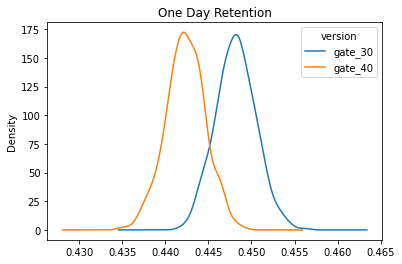

In [ ]:
#Hint: Plot density function
#1 Day
plot_1d = []
#Resampling
for i in range(500):
    mean = df.sample(frac=1,replace=True).groupby('version')['retention_1'].mean()
    plot_1d.append(mean)
    
# Transforming the list to a DataFrame
plot_1d = pd.DataFrame(plot_1d)
  
# A Kernel Density Estimate plot of the distributions
plot_1d.plot.kde(title="One Day Retention")

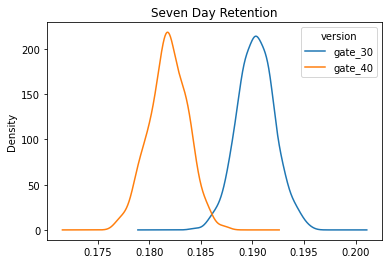

In [ ]:
#7 Day
plot_7d = []
#Resampling
for i in range(500):
    mean = df.sample(frac=1,replace=True).groupby('version')['retention_7'].mean()
    plot_7d.append(mean)
    
# Transforming the list to a DataFrame
plot_7d = pd.DataFrame(plot_7d)
  
# A Kernel Density Estimate plot of the distributions
plot_7d.plot.kde(title="Seven Day Retention")